In [72]:
import tensorflow
from tensorflow import *
"""import keras"""

'import keras'

In [71]:
from numpy import load
path = '/home/nastya/anaconda3/mnist.npz'
with load(path, allow_pickle=True) as f:
    train_X, train_y = f['x_train'], f['y_train']
    test_X, test_y = f['x_test'], f['y_test']

In [24]:
train_X.shape
test_X.shape

(10000, 28, 28)

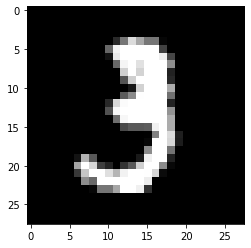

In [26]:
from matplotlib import pyplot
pyplot.figure(2, figsize=(4, 4))
pyplot.imshow(train_X[10], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [27]:
train_y[10]

3

In [28]:
train_X = train_X.reshape((60000, 784))
test_X = test_X.reshape((10000, 784))

In [29]:
test_X.shape

(10000, 784)

In [30]:
train_X[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254,
       254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 25

In [31]:
train_X_bin = train_X > 70
train_X_bin = train_X_bin.astype(int)
test_X_bin = test_X > 70
test_X_bin = test_X_bin.astype(int)

In [32]:
from sklearn import svm

In [54]:
lin_clf = svm.LinearSVC(dual = False, tol = 1e-3, max_iter = 1000)
lin_clf.fit(train_X, train_y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)

In [55]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
y_pred = lin_clf.predict(test_X)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [57]:
test_y[10]

0

In [58]:
y_pred[10]

0

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(test_y, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[ 960,    0,    1,    1,    1,    4,    6,    2,    3,    2],
       [   0, 1111,    4,    2,    0,    1,    4,    1,   11,    1],
       [   7,   10,  913,   19,    9,    4,   15,   12,   40,    3],
       [   3,    0,   18,  921,    2,   19,    5,   12,   22,    8],
       [   1,    3,    4,    3,  912,    0,   12,    3,    5,   39],
       [  10,    2,    2,   37,   12,  762,   19,    7,   31,   10],
       [   9,    3,    8,    1,    5,   18,  908,    0,    6,    0],
       [   2,    6,   23,    3,    8,    2,    1,  945,    5,   33],
       [   6,    9,    8,   19,   13,   30,    8,   11,  857,   13],
       [   6,    8,    2,   14,   31,    9,    0,   25,   17,  897]])